In [20]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.metrics import accuracy_score
from scipy.optimize import fmin_tnc

In [21]:
class LogisticRegression:

    @staticmethod
    def sigmoid(x):
        return 1 / (1 + np.exp(-x))

    @staticmethod
    def net_input(theta, x):
        # Вычисляем взвешенную сумму входных данных аналогично линейной регрессии
        return np.dot(x, theta)

    def probability(self, theta, x):
       # Вычисляем вероятность принадлежности 
        return self.sigmoid(self.net_input(theta, x))

    def cost_function(self, theta, x, y):
        # Вычисляем функцию cost для всех обучающих выборок
        m = x.shape[0]
        total_cost = -(1 / m) * np.sum(
            y * np.log(self.probability(theta, x)) + (1 - y) * np.log(
                1 - self.probability(theta, x)))
        return total_cost

    def gradient(self, theta, x, y):
       # Вычисляет градиент функции cost в точке theta
        m = x.shape[0]
        return (1 / m) * np.dot(x.T, self.sigmoid(self.net_input(theta, x)) - y)

    def fit(self, x, y, theta):
         #обучаем модель на основе обучающих данных
        opt_weights = fmin_tnc(func=self.cost_function, x0=theta, fprime=self.gradient,
                               args=(x, y.flatten()))
        self.w_ = opt_weights[0]
        return self

    def predict(self, x):
        #Прогнозируем ярлыки классов
        theta = self.w_[:, np.newaxis]
        return self.probability(theta, x)

    def accuracy(self, x, actual_classes, probab_threshold=0.5):
        # вычисляем точность
        predicted_classes = (self.predict(x) >= probab_threshold).astype(int)
        predicted_classes = predicted_classes.flatten()
        accuracy = np.mean(predicted_classes == actual_classes)
        return accuracy * 100


In [22]:
data = pd.read_csv("data/marks.txt", header=None)
data.head(10)

,0,1,2
0,34.623660,78.024693,0
1,30.286711,43.894998,0
2,35.847409,72.902198,0
3,60.182599,86.308552,1
4,79.032736,75.344376,1
5,45.083277,56.316372,0
6,61.106665,96.511426,1
7,75.024746,46.554014,1
8,76.098787,87.420570,1
9,84.432820,43.533393,1


In [31]:
X = data.iloc[:, :-1]
y = data.iloc[:, -1]


admitted = data.loc[y == 1]
not_admitted = data.loc[y == 0]

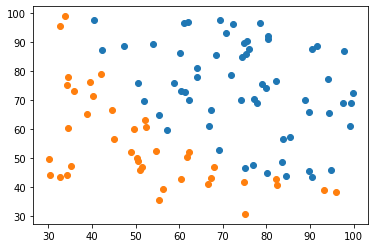

In [33]:
plt.scatter(admitted.iloc[:, 0], admitted.iloc[:, 1])
plt.scatter(not_admitted.iloc[:, 0], not_admitted.iloc[:, 1])

In [34]:
X = np.c_[np.ones((X.shape[0], 1)), X]
y = y[:, np.newaxis]
theta = np.zeros((X.shape[1], 1))

<ipython-input-34-bde2c39fb27a>:2: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  y = y[:, np.newaxis]


In [35]:
model = LogisticRegression()
model.fit(X, y, theta)

In [36]:
accuracy = model.accuracy(X, y.flatten())
print("The accuracy of the model is {}".format(accuracy))

The accuracy of the model is 89.0


In [37]:
parameters = model.w_
print(parameters)

[-25.16131865   0.20623159   0.20147149]


No handles with labels found to put in legend.


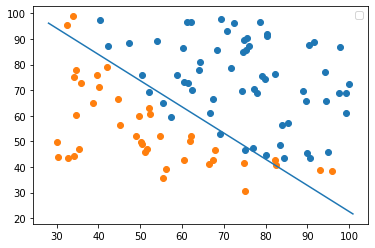

In [38]:
# wo + w1x1 + w2x2 = 0
# x2 = - (wo + w1x1) / (w2)

x_values = [np.min(X[:, 1] - 2), np.max(X[:, 2] + 2)]
y_values = - (parameters[0] + np.dot(parameters[1], x_values)) / parameters[2]

plt.scatter(admitted.iloc[:, 0], admitted.iloc[:, 1])
plt.scatter(not_admitted.iloc[:, 0], not_admitted.iloc[:, 1])
plt.plot(x_values, y_values)
plt.legend()
plt.show()